--- 
Project for the course in Microeconometrics | Summer 2021, M.Sc. Economics, Bonn University | [Bahar Coskun](https://github.com/baharcos)

# Replication of Joshua Angrist, Daniel Lang, and Philipp Oreopoulous (2009) <a class="tocSkip">   
---

The following notebook contains my replication of the results of

> Angrist, J., Land, D., & Oreopoulos, P. (2009). Incentives And Services For College Achievement: Evidence From A Randomized Trial. American Economic Journal: Applied Economics, 1(1), 136-63.

#### Downloading and Viewing this Notebook

* To ensure that every image and format is displayed properly, I recommend to download this notebook from its repository on [GitHub](https://github.com/OpenSourceEconomics/ose-data-science-course-project-baharcos). Other viewing options like _MyBinder_ or _NBViewer_ might have issues displaying formulas and formatting.

* The original data, code and paper can be found [here](https://economics.mit.edu/faculty/angrist/data1/data/angrist,1)

#### Information about the Replication and Individual Contributions

* I have labeled all figures and tables in this notebook in an ascending order to prevent confusion of the reader. If it is a replication, I always indicate the label of the corresponding figure and table referencing to the original paper.

* I always explicitly state, when I give the opinion of the author.

* All sections and subsections that are labeled as *Extension* are my independent contributions.  

* For more detailed information it is always refered to Angrist et. al. [(2009)](https://www.aeaweb.org/articles?id=10.1257/app.1.1.136) I replicated the results from the main analysis.

* The layout and the structure of the notebook is inspired by Annica Gehlen's replication of Jason M. Lindo, Nicholas J. Sanders & Philip Oreopoulos (2010) from the 2019 iteration of the Microeconometrics class. [(link)](https://github.com/amageh/replication-performance-standards/blob/master/replication-notebook.ipynb)

<h1> Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span><ul class="toc-item">
    <li><span><a href="#1.1-Motivation" data-toc-modified-id="1.1-Motivation-1.1">1.1 Motivation</a></span></li> 
<li><span><a href="#1.2-Study Design" data-toc-modified-id="1.2-Study Design">1.2 Study Design</a></span></li>
    <li><span><a href="#1.3-Estimation Strategy" data-toc-modified-id="1.3-Estimation Strategy">1.3 Estimation Strategy</a></span></li>
    <li><span><a href="#1.4-Main Findings" data-toc-modified-id="1.4-Main Findings">1.4 Main Findings</a></span></li>
    <li><span><a href="#1.5-Replication Notebook" data-toc-modified-id="1.5-Replication Notebook">1.5 Replication Notebook</a></span></li>
    </li><li><span><a href="#2.-Study Design, Data and Extention | Descriptives" data-toc-modified-id="2.-Study Design, Data and Extention | Descriptives-2">2. Study Design, Data and Extention | Descriptives</a></span><ul class="toc-item">
    <li><span><a href="#2.1-STAR Demonstration Project" data-toc-modified-id="2.1-STAR Demonstration Project-1.1">1.1 STAR Demonstration Project</a></span></li> 
<li><span><a href="#2.2-Data" data-toc-modified-id="2.2-Data">2.2 Data</a></span></li>
    <li><span><a href="#2.3 Extension | Data Descriptives" data-toc-modified-id="2.3 Extension | Data Descriptives">2.3 Extension | Data Descriptives</a></span></li>
     </li><li><span><a href="#3.-Identification and Empirical Strategy" data-toc-modified-id="3.-Identification and Empirical Strategy-2">3. Identification and Empirical Strategy</a></span></li> <li><span><a href="#4.-Replication-of-Angrist-et-al.-(2009)" data-toc-modified-id="4.-Replication-of-Angrist-et-al.-(2009)-4">4. Replication-of-Angrist-et-al.-(2009)</a></span></li>
    <li><span><a href="#5.-Extension" data-toc-modified-id="5.-Extension-5">5.Extension</a></span></li>
    <li><span><a href="#6.-Conclusion-and-Critical-Assessment" data-toc-modified-id="6.-Conclusion-and-Critical-Assessment-6">6. Conclusion  and Critical Assessment</a></span></li>
<li><span><a href="#7.-References" data-toc-modified-id="7.-References-7">7. References</a></span></li></ul></div></li>

---

In [4]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from linearmodels import IV2SLS
from auxiliary.colors import get_colors
from auxiliary.colors import plot_colors
from auxiliary.plot import participation_share_plot

In [5]:
colors = get_colors('categorical', 12)

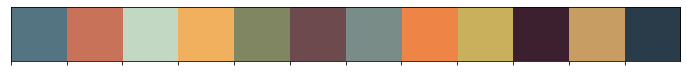

In [28]:
plot_colors('categorical', 12)

---
# 1. Introduction
---

## 1.1 Motivation
The motivation of Angrist et al.(2009) comes from the importance of academic performance, not dropping out from the program and completing on time for post-secondary education experience. Something that many students, particularly ones from low-income families, struggle to achieve. One reason for this is poor study skills. As a response many North American universities offer academic services to improve skills like note taking, time management or goal-setting. However, the non-experimental research on academic support services for college students have found mixed results even though experimental design of the same services on high school students drew a more promising picture. 
Furthermore to motivate better academic performance merit scholarship have been part of college education for a long time. Although only a small group of spectacular students have benefitted from this financial incentive. 

## 1.2 Study Design
Angrist et al. (2009) analysis the results of Student Achievement and Retention (STAR) Demonstration Project. STAR is designed as a randomised evaluation to learn more about the effects of support services and financial incentives on academic performance at a satellite campus of a large Canadian university that is in U.S. terms a large state university with heavily subsidised tuition fees. Students attending are mostly from local area and have similar high school background which further eliminates geographic background differences that could arise in the treatment.

## 1.3 Estimation Strategy
Students are randomly allocated into control or one of the treatment groups. Students in a treatment group receive an offer and the have to signed up to be eligible which is not random. In order to estimate the causal impact of financial incentives and academic support services Angrist et al. (2009) use **instrumental variables (IV)**. However, due to the low compliance rate most results reported are **intent-to-treat (ITT)** estimates. The data comes from 1656 full time first year students combining administrative data and survey data which the students took **prior** to the treatment selection.


**Main variables**

| **Treatments**        | **Outcome Variables**  |
|-----------------------|------------------------|
| Services:ssp          | GPA                    |
| Incentives:sfp        | On probation/withdrew  |              
| Combined:sfsp         | Credits earned         | 

Angrist et al. (2009) use students grades on fall term, first and second year GPA as a direct measure for performance. Although many students take a lighter course load across semesters. To this end, credits earned outcome measures how likely the student is to complete on time hence, the academic performance.
Lastly authors look at how effective the treatment is to keep students out of being in probation or withdrawing.

## 1.4. Main Findings 
Main findings of Angrist et al. (2009) are: 
- Female students are more likely to use the services
- Male achievement remained unchanged with the intervention 
- Services itself failed to attract students
- Incentives itself motivated both genders to have better academic performance. However, there was no lasting effect
- The combined treatment as well as service treatment had lasting effects even when the treatment was not in place
- Female achievement in services combined with financial incentives increased students GPA about 0.35$\sigma$
- The cost of the policy is very small compared to the increase of future income of the students by better academic performance

## 1.5 Replication Notebook

In this notebook, I replicate Table 5, Table 8 and Figure 1 of Angrist et al. (2009) which I consider as the key results. As an extension I give an extended overview of the data through tables and various plots and do balance checks between groups who are offered a treatment and who actually signed up for the treatment. Section 2 presents the STAR study design and participating students background. I describe the identification strategy of Angrist et al. (2009) to find causal effects in section 3. Section 4 shows my replication results of the paper. In section 5, I conduct balance checks on students participated in the treatment and for assumptions of the IV estimator. Section 6 gives a critical assessment of Angrist et al. (2009) results and concludes.

---
# 2. Study Design, Data and Extention | Descriptives
---
## 2.1. STAR Demonstration Project

STAR randomly assigned entering first-year undergreduates into the control group or one of the treatment groups below:
Service strategy SSP: peer advisors are trained upper-class students  in the treated students' program offering academic advise and suggestions for coping with first year of university. Advisor email regularly(at least biweekly) about university assimilation, scheduling, studying, time management, reminding availability of the services to meet at STAR office. Also trained for circumstances to call for professional help. In addition facilitated study groups(FSG) are offered to improve study habits complement normal tutorials, develop reasoning skills. FSG focuses on skils such as critical thinking, note-taking, graphic organisation, questioning techniques, vocabulary acquisition, and test prediction and preparation. They offered approximately half of first year courses. Some of large courses offered the service to all students because it was in place before the experiment

Incentive strategy SFP: students are awarded either full fellowship($5000) or a partial fellowship($1000). Award targets are based on high school grades which is shown in table below. Targets based on trade off between program costs and award accessibility

**Award Targets**

| **Grade Quantile**   | **5000 threshold**   | **1000 threshold**  |
|----------------------|----------------------|---------------------|
| lowest quantile      | B                    | C+                  |
| second quartile      | B+                   | B-                  |
| third quantile       | A-                   | B                   |



Third and final treatment group is the combined strategy SFSP where students are offered both academic services in SSP and fellowship program in SFP. There is no link between two strategies such that students can use the service without being eligible to fellowship and can be eligible for fellowship without using the service.

## 2.2 Data

Main source of data is baselie survey the students have taken prior to assignment. The variables for mothertongue, high school grades, average college grades come from administrative data.

In [6]:
data = pd.read_stata('data/STAR_public_use.dta') #read the data

In [12]:
data.info() # check variables, missing values and data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 1655
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   GPA_year1           1537 non-null   float32 
 1   GPA_year2           1368 non-null   float32 
 2   age                 1656 non-null   int8    
 3   chooseUTM           1472 non-null   float32 
 4   compsurv            1656 non-null   float32 
 5   control             1656 non-null   int8    
 6   credits_earned1     1575 non-null   float32 
 7   credits_earned2     1575 non-null   float32 
 8   dad1                1472 non-null   float32 
 9   dad2                1472 non-null   float32 
 10  dad_edn             1472 non-null   category
 11  english             1656 non-null   int8    
 12  female              1656 non-null   int8    
 13  finish4             1472 non-null   float64 
 14  goodstanding_year1  1634 non-null   float32 
 15  goodstanding_year2  1634 non-null   fl

### 2.2.1 Data Management
Angrist et al. (2009) exclude students from analysis who did not show up (no shows) and students who took less than 2 courses from the analysis. Angrist et al. (2009)'s motivation to exclude students who took less than 2 courses is that to keep students who take a light course load and very unlikely to finish on time out from the analysis. Even though the do not incorporate these students into baseline regression for intent-to-treat estimates. The authors do not make any grade restrictions in two staged IV regression which inflates the causal effects compared to baseline. 
I use the same dataset for all regressions for more robust results.

In [7]:
data = data[data['noshow']==0] #exclude no shows
data = data.dropna(subset=['grade_20059_fall']) #exclude students who did not recieve any grade in fall
data = data.dropna(subset=['GPA_year1']) #exclude student who did not recieve any first year gpa
data = data[data['credits_earned1']>=2] # exclude student who earned less than 2 credits in first year

In [105]:
ssp = data[data['ssp']== 1.0] #service treatment group
sfp = data[data['sfp']== 1.0] #incentives treatment group
sfsp = data[data['sfsp']== 1.0] #combined treatment group
control = control = data[data['control'] == 1]

In [ ]:
data['numcourses_nov1'] = data['numcourses_nov1'].astype(int)
regression_data = pd.get_dummies(data=data, columns =['mtongue', 'hsgroup', 'mom_edn',
                                   'lastmin', 'dad_edn', 'numcourses_nov1'], drop_first=True)
regression_data = regression_data.rename(columns={"mom_edn_graduated from high school":"mom_edn1","mom_edn_ attended a community college but did not complete diploma":"mom_edn2",
                                                     "mom_edn_completed a community college diploma program": "mom_edn3", "mom_edn_attended university but did not complete bachelor s degree":"mom_edn4",
                                                     "mom_edn_completed a bachelor s degree (b.a., b.comm., etc)":"mom_edn5", "mom_edn_completed a master s degree (m.a., m.sc., etc)":"mom_edn6",
                                                     "mom_edn_completed a doctoral degree or professional program (ph.d., ":"mom_edn7", "mom_edn_don t know/not applicable": "mom_edn8",
                                                     "dad_edn_graduated from high school":"dad_edn1", "dad_edn_ attended a community college but did not complete diploma": "dad_edn2",
                                                     "dad_edn_completed a community college diploma program": "dad_edn3", "dad_edn_attended university but did not complete bachelor s degree": "dad_edn4",
                                                     "dad_edn_completed a bachelor s degree (b.a., b.comm., etc)":"dad_edn5","dad_edn_completed a master s degree (m.a., m.sc., etc)":"dad_edn6",
                                                     "dad_edn_completed a doctoral degree or professional program (ph.d., ": "dad_edn7", "dad_edn_don t know/not applicable": "dad_edn8"})

In [102]:
regression_data_female = regression_data[regression_data['sex']=='F']
regression_data_male = regression_data[regression_data['sex']=='M']

## 2.3 Extension | Data Descriptives

Here I focus on the background of the students. I visually highlight the key descriptives of the data mentioned in Angrist et al. (2009) and report more detailed than in paper to give an easy-to-comprehend insight on the data set to the readers.

In [94]:
data[['GPA_year1', 'GPA_year2', 'grade_20059_fall', 'credits_earned1', 'credits_earned2', 'work1',
      'goodstanding_year1', 'goodstanding_year2']].describe()

,GPA_year1,GPA_year2,grade_20059_fall,credits_earned1,credits_earned2,work1,goodstanding_year1,goodstanding_year2
count,1108.000000,1021.000000,1108.000000,1108.000000,1108.000000,1020.000000,1108.000000,1108.000000
mean,2.069394,2.248090,67.544838,2.835289,2.840027,0.761765,0.609206,0.778881
std,0.747877,0.789052,8.518441,0.633536,1.340205,0.426219,0.488148,0.415188
min,0.530000,0.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.480000,1.770000,61.500000,2.500000,2.000000,1.000000,0.000000,1.000000
50%,2.010000,2.300000,67.666664,3.000000,3.000000,1.000000,1.000000,1.000000
75%,2.610000,2.800000,73.000000,3.000000,3.500000,1.000000,1.000000,1.000000
max,4.000000,4.000000,94.000000,7.500000,7.500000,1.000000,1.000000,1.000000


In total of 548 students are dropped from the sample either because they did not registered to any courses, took less than 2 credits in one year. The remaining students seem to average around a GPA of 2.0, take a credit load of 3 courses per year. Almost half of them have a good standing(not on probation) academic performance by the end of first year which drops to 41 percent in second year. 76 percent of the students reported that they would like to work together with their studies.

**Parent Education and Migration Background** \
Students in STAR seem to come mostly from well-educated parents as most parents have at least a bachelor's degree. The parents show gender differences such that the second most common mother education background is high-school degree while for fathers it is a communit college diploma. Morever 30 percent of the student do not speak English as their mothertongue hindering their migration background as seen in the graph below.

In [35]:
data.dad_edn.value_counts()

completed a bachelor s degree (b.a., b.comm., etc)              286
completed a community college diploma program                   166
graduated from high school                                      139
completed a master s degree (m.a., m.sc., etc)                  136
did not finish high school                                       88
don t know/not applicable                                        72
completed a doctoral degree or professional program (ph.d.,      63
attended university but did not complete bachelor s degree       41
 attended a community college but did not complete diploma       29
Name: dad_edn, dtype: int64

In [34]:
data.mom_edn.value_counts()

completed a bachelor s degree (b.a., b.comm., etc)              260
graduated from high school                                      220
completed a community college diploma program                   214
completed a master s degree (m.a., m.sc., etc)                   85
don t know/not applicable                                        71
did not finish high school                                       69
attended university but did not complete bachelor s degree       41
 attended a community college but did not complete diploma       34
completed a doctoral degree or professional program (ph.d.,      26
Name: mom_edn, dtype: int64

<AxesSubplot:title={'center':'Mothertongue of students'}>

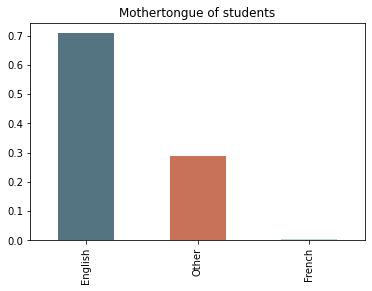

In [26]:
data.mtongue.value_counts(normalize=True).plot.bar(color=colors, title='Mothertongue of students')

**Grade Quantile Distribution** \
Important thing to note here again is that the highest achieving highschool students are not offered a treatment, neither included in the control group. Majority of the students in the STAR sample are in the upper middle quantile of high school graduation grades.

<AxesSubplot:title={'center':'Students by high school GPA'}>

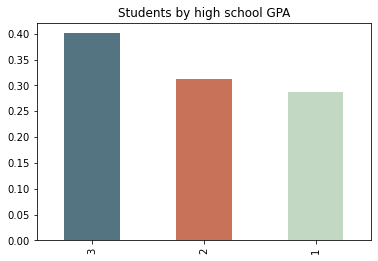

In [36]:
data.hsgroup.value_counts(
    normalize=True).plot.bar(color=colors, 
                             title='Students by high school GPA quartiles')

**Study Habits** \
Most student in the sample reports to leave studying for exams to last minute. This hints that many students in the demonstration project do not have good study habits

<AxesSubplot:title={'center':'Leaves studing to last minute'}>

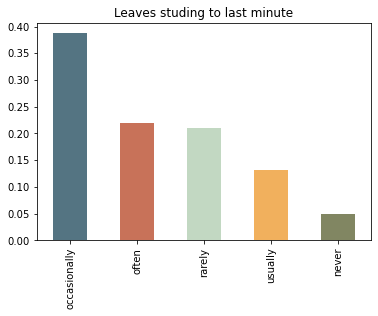

In [12]:
data.lastmin.value_counts(normalize=True).plot.bar(color=colors, title = 'Leaves studing to last minute' )

---
# 3. Identification and Empirical Strategy
---
The main goal of the Angrist et al. (2009) is to determine the causal effect of incentives and services on academic performance.
In STAR Demonstration project they face the incomplete random assignment challenge to estiamte the true causal effect of the program. The randomised offer do not force students into participate. Students needs to sign-up in order to recieve emails from the program and to be a participant. Sign-up procedure used to determine who is actually motivated to use the program by paying a small cost. However, sign up creates selection bias.  
Only people who received an offer can participate in one of the programs and participation is expected to improve academic performance.
The first stage is the effect of offer on sign-up rates. Which is by offer how likely you are to sign up This is given by the compliance rate. 
Second stage is effect of participation on academic performance
Reduced form effect can be written as (ITT: effect of offer on academic performance) = effect of offer on sign-up rates x effect of participation on academic performance
What we want to find out the effect of participation on academic performance. To do so with the causal specification below, it is possible to use the offer as an instrument as used in Angrist et al. (2009)


<img src="files/causalgraph.png" width=500 />

**Key Assumptions:**
Substantial first stage: The offer should really change the sign up, as only students who recieves an offer can sign up, it is safe to say that this assumption holds

Independence assumption: The instrument has to be as good as randomly assigned. The offer is given to students b random assignment. The authors still run checks for balance on treatment groups with control variables in table 1. Controlling for no group of students are suspiciously more likely to selected for treatment. 

Exclusion restriction:  We require the instrument changing outcome solely through the variable of interest. The authors check this by running an additional over-identified iv regression.??

If these assumptions hold the causal effect of participation can be identified by IV.

**Evaluation Framework of Angrist et al. (2009)**\
ITT: no correction for sign up and dilluted by non compliance
IV: the offer of services for program sign-up (to estimate the effect of treatment on those who signed up who are not random)
$P_i = 1$ represents people who gave concent(signed up) to recieve emails \
$Z_i$ is the random variable representing random assignment offer of treatment

\begin{equation}
E[Y_{1i} - Y_{0i} |P_i=1] = (E[Y_i|Z_i = 1] - E[Y_i|Z_i = 0]) / Pr[P_i = 1|Z_i = 1]
\end{equation}

- $E[Y_{1i} - Y_{0i} |P_i=1]$ is the true casual effect of participation on one of the treatment programs.

- $E[Y_i|Z_i = 1] - E[Y_i|Z_i = 0]$ is the intend-to-treat estimate given by the service offer

- $Pr[P_i = 1|Z_i = 1]$ is the compliance rate

---
# 4. Replication of Angrist et al. (2009)
---

The authors runs checks to establish all three assumptions for IV causal effect identification. For the 
Main results of the paper are reduced form ITT(intent-to-treat) estimates.

### Replication of Table 5 in Angrist et al. (2009)
For table 5 of Angrist et al. (2009) the authors run a series of regression on GPA and first semester grades of all students and then of female and male students separetely. Table 5 does not report on control variables even though in the regression code they run the control variables are also included. However, non of them are statistically significant themselves and they are neither jointly significant. The estimates for the treatment change only incrementally without controls. That's why I chose to exclude them in the regressions I report here. My explaination on regression results can be found under each regression table.

#### Regressions on Fall Semester Grades(scaled to 0-100)

In [25]:
rslt_all = smf.ols(formula="grade_20059_fall ~ ssp + sfp + sfsp", data=data).fit()
rslt_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       grade_20059_fall   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.523
Date:                Fri, 23 Jul 2021   Prob (F-statistic):             0.0563
Time:                        00:04:45   Log-Likelihood:                -5445.0
No. Observations:                1398   AIC:                         1.090e+04
Df Residuals:                    1394   BIC:                         1.092e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.8430      0.408    156.289      0.000      63.042      64.644
ssp            0.2533      0.916      0.277      0.782      -1.544       2.050
sfp            1.9876      0.903      2.202      0.028       0.217       3.758
sfsp           2.2608      1.170      1.932      0.054      -0.034       4.556
==============================================================================
Omnibus:                      423.567   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1653.958
Skew:                          -1.420   Prob(JB):                         0.00
Kurtosis:                       7.509   Cond. No.                         4.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both SFP(financial incentives) and SFSP(combined treatment) have significant effects at 1 percent level and of about a 1 percent increase on all students fall grades, SSP on the other hand have a very small insignificant effect.

In [33]:
data_female = data[data['sex']== 'F']
result_female = smf.ols(formula="grade_20059_fall ~ ssp + sfp + sfsp", data = data_female).fit()
result_female.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       grade_20059_fall   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.179
Date:                Fri, 23 Jul 2021   Prob (F-statistic):            0.00606
Time:                        14:06:39   Log-Likelihood:                -2292.1
No. Observations:                 641   AIC:                             4592.
Df Residuals:                     637   BIC:                             4610.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.0146      0.446    148.009      0.000      65.139      66.890
ssp            0.4966      0.987      0.503      0.615      -1.442       2.435
sfp            3.0135      0.950      3.174      0.002       1.149       4.878
sfsp           2.4854      1.214      2.048      0.041       0.102       4.869
==============================================================================
Omnibus:                        2.251   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                2.064
Skew:                          -0.124   Prob(JB):                        0.356
Kurtosis:                       3.127   Cond. No.                         3.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
data_male = data [data['sex'] == 'M']
result_male = smf.ols(formula="grade_20059_fall ~ ssp + sfp + sfsp", data=data_male).fit()
result_male.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       grade_20059_fall   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1698
Date:                Fri, 23 Jul 2021   Prob (F-statistic):              0.917
Time:                        00:15:46   Log-Likelihood:                -2346.8
No. Observations:                 602   AIC:                             4702.
Df Residuals:                     598   BIC:                             4719.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.1736      0.622    104.830      0.000      63.953      66.395
ssp           -0.4306      1.377     -0.313      0.755      -3.135       2.274
sfp            0.7921      1.440      0.550      0.582      -2.036       3.620
sfsp          -0.2210      1.788     -0.124      0.902      -3.733       3.291
==============================================================================
Omnibus:                      201.151   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              731.479
Skew:                          -1.535   Prob(JB):                    1.45e-159
Kurtosis:                       7.443   Cond. No.                         3.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When the regression is run on females and males separetely, it becomes clear that the effect on all students are driven by female students. SFP increases the fall grades by 3 percent while SFSP increases the fall grades by 2.5 percent and both are statisticall significant for female students. The treatment effects on male students on the other hand are statistically insignificant at 10 percent level.

#### Regressions on First Year GPA
All results on first year gpa are insignificant when run on all students as well as on females. SFP estimate on male regression shows a small negative statistically significant efffect on first ear GPA.

In [82]:
rslt_all_gpa_year1 = smf.ols(formula= "GPA_year1 ~ ssp + sfp + sfsp ", data=data).fit()
rslt_all_gpa_year1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              GPA_year1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6938
Date:                Fri, 23 Jul 2021   Prob (F-statistic):              0.556
Time:                        16:03:30   Log-Likelihood:                -1248.7
No. Observations:                1108   AIC:                             2505.
Df Residuals:                    1104   BIC:                             2526.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0585      0.029     70.949      0.000       2.002       2.115
ssp            0.0414      0.064      0.648      0.517      -0.084       0.167
sfp           -0.0248      0.064     -0.389      0.697      -0.150       0.100
sfsp           0.0965      0.082      1.182      0.238      -0.064       0.257
==============================================================================
Omnibus:                       62.183   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.697
Skew:                           0.276   Prob(JB):                     2.92e-08
Kurtosis:                       2.331   Cond. No.                         3.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
rslt_female_gpa_year1 = smf.ols(formula= "GPA_year1 ~ ssp + sfp + sfsp", data=data_female).fit()
rslt_female_gpa_year1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              GPA_year1   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.110
Date:                Fri, 23 Jul 2021   Prob (F-statistic):              0.344
Time:                        15:32:38   Log-Likelihood:                -717.06
No. Observations:                 641   AIC:                             1442.
Df Residuals:                     637   BIC:                             1460.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9898      0.038     52.073      0.000       1.915       2.065
ssp            0.0833      0.085      0.985      0.325      -0.083       0.249
sfp            0.1235      0.081      1.518      0.129      -0.036       0.283
sfsp           0.1129      0.104      1.085      0.278      -0.091       0.317
==============================================================================
Omnibus:                       30.618   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.191
Skew:                           0.368   Prob(JB):                     9.21e-06
Kurtosis:                       2.429   Cond. No.                         3.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
rslt_male_gpa_year1 = smf.ols(formula= "GPA_year1 ~ ssp + sfp + sfsp", data=regression_data_male).fit()
rslt_male_gpa_year1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              GPA_year1   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.273
Date:                Fri, 23 Jul 2021   Prob (F-statistic):             0.0794
Time:                        21:01:33   Log-Likelihood:                -525.84
No. Observations:                 467   AIC:                             1060.
Df Residuals:                     463   BIC:                             1076.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1489      0.044     48.585      0.000       2.062       2.236
ssp           -0.0149      0.097     -0.154      0.878      -0.205       0.175
sfp           -0.2424      0.102     -2.385      0.017      -0.442      -0.043
sfsp           0.0895      0.131      0.684      0.494      -0.168       0.347
==============================================================================
Omnibus:                       26.222   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.198
Skew:                           0.173   Prob(JB):                      0.00224
Kurtosis:                       2.288   Cond. No.                         4.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Replication of Figure 1 in Angrist et al. (2009)
The regression estimates does not give the full insight on how the students for example in the lowest quantile or in the upper quantile in college grades is effected by the program. Morever, authors find it hard to interpret how the students who does not have a chance to win the scholarship effected by the treatment from the regression.
Figure 1 of Angrist et al. (2009) looks at the fall grade distributions of treatment groups and control seperately for male and female students. The blue line is for control and the orange line is for treatments. The results for males are mixed. While for females in SFP and SFSP groups almost at all data points we see that treatment group do better as can be seen in second and third graph below. 

<AxesSubplot:ylabel='Density'>

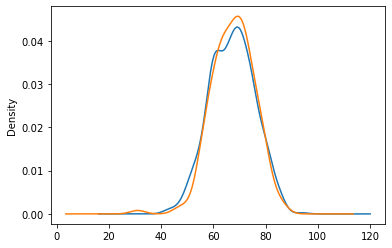

In [107]:
control.grade_20059_fall.plot.kde()
ssp.grade_20059_fall.plot.kde()

<AxesSubplot:ylabel='Density'>

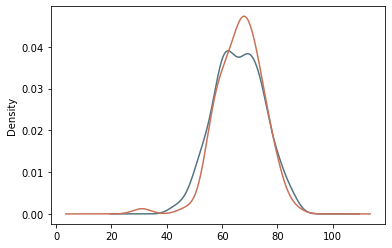

In [48]:
control[control['sex']== 'F'].grade_20059_fall.plot.kde()
ssp[ssp['sex']== 'F'].grade_20059_fall.plot.kde()

<AxesSubplot:ylabel='Density'>

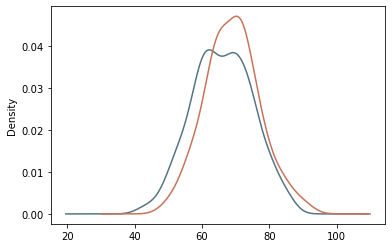

In [49]:
control[control['sex']== 'F'].grade_20059_fall.plot.kde()
sfp[sfp['sex']== 'F'].grade_20059_fall.plot.kde()

<AxesSubplot:ylabel='Density'>

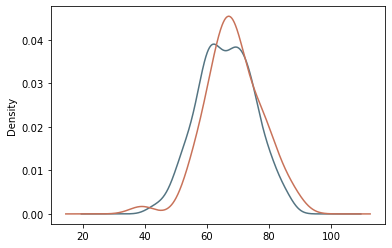

In [50]:
control[control['sex']== 'F'].grade_20059_fall.plot.kde()
sfsp[sfsp['sex']== 'F'].grade_20059_fall.plot.kde()

<AxesSubplot:ylabel='Density'>

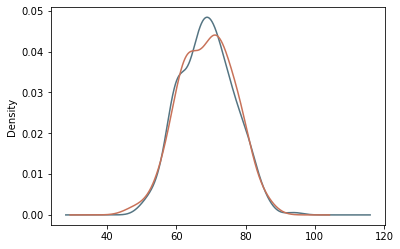

In [51]:
control[control['sex']== 'M'].grade_20059_fall.plot.kde()
ssp[ssp['sex']== 'M'].grade_20059_fall.plot.kde()

<AxesSubplot:ylabel='Density'>

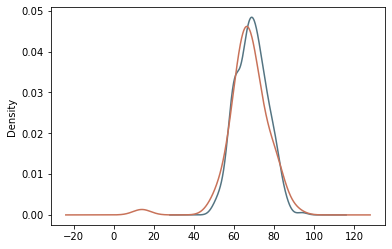

In [52]:
control[control['sex']== 'M'].grade_20059_fall.plot.kde()
sfp[sfp['sex']== 'M'].grade_20059_fall.plot.kde()

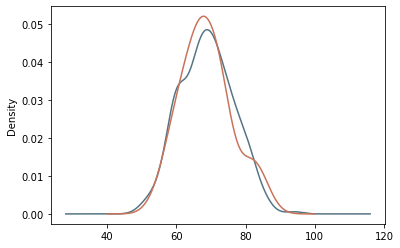

In [58]:
a = control[control['sex']== 'M'].grade_20059_fall.plot.kde()
b = sfsp[sfsp['sex']== 'M'].grade_20059_fall.plot.kde()

### Replication of Table 8 in Angrist et al. (2009)
Angrist et al. (2009) reports on two-staged least square IV Estimates on female's second year GPA(to check for lasting impact of the intervention), credits earned and on whether they are on propation. The only female results are reported in Angrist et al. (2009) Table 8. The reason is that the intervention only had significant causal effects on women. The conrol variable of mothertongue, parent education, number of courses taken and treatment offer are used as instruments to estimate the causal effect of participating in the program.

In [109]:
regression_data_female["const"] = 1

<ipython-input-109-aeddadefa01d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data_female["const"] = 1


#### 2SLS on Probation Rates
The authors use the full data set for these regression while I use the same subsetted data set from Table 5 for more consistent comparision. The students who are more likely to be on probation are excluded. That is why here I do not report any statistically significant results.

In [110]:
IV2SLS(regression_data_female['prob_year2'],exog=regression_data_female["const"] ,endog = regression_data_female[['ssp_p', 'sfp_p', 'sfsp_p']],
        instruments = regression_data_female[['ssp', 'sfp', 'sfsp','mtongue_French', 'mtongue_Other', 
                               'hsgroup_2', 'hsgroup_3','mom_edn1', 'mom_edn2', 'mom_edn3', 
                               'mom_edn4', 'mom_edn5', 'mom_edn6','mom_edn7', 'mom_edn8', 
                               'lastmin_often', 'lastmin_occasionally','lastmin_rarely', 
                               'lastmin_never', 'dad_edn1', 'dad_edn2', 'dad_edn3',
                               'dad_edn4', 'dad_edn5', 'dad_edn6', 'dad_edn7', 'dad_edn8',
                               'numcourses_nov1_3', 'numcourses_nov1_4', 'numcourses_nov1_5',
                               'numcourses_nov1_6']]).fit()

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:             prob_year2   R-squared:                      0.0029
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0018
No. Observations:                 641   F-statistic:                    3.4986
Date:                Fri, Jul 23 2021   P-value (F-stat)                0.3209
Time:                        21:28:42   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          0.1319     0.0172     7.6653     0.0000      0.0982      0.1657
ssp_p          0.1092     0.0733     1.4894     0.1364     -0.0345      0.2529
sfp_p         -0.0194     0.0377    -0.5141     0.6072     -0.0932      0.0544
sfsp_p        -0.0373     0.0528    -0.7065     0.4799     -0.1407      0.0662
==============================================================================

Endogenous: ssp_p, sfp_p, sfsp_p
Instruments: ssp, sfp, sfsp, mtongue_French, mtongue_Other, hsgroup_2, hsgroup_3, mom_edn1, mom_edn2, mom_edn3, mom_edn4, mom_edn5, mom_edn6, mom_edn7, mom_edn8, lastmin_often, lastmin_occasionally, lastmin_rarely, lastmin_never, dad_edn1, dad_edn2, dad_edn3, dad_edn4, dad_edn5, dad_edn6, dad_edn7, dad_edn8, numcourses_nov1_3, numcourses_nov1_4, numcourses_nov1_5, numcourses_nov1_6
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x7fbe86c6b130

#### 2SLS on Creadits Earned in Second Year
Here we see that program participation does not have a significant effect on credits earned b female students in second year.

In [111]:
IV2SLS(regression_data_female['credits_earned2'],exog=regression_data_female["const"] ,endog = regression_data_female[['ssp_p', 'sfp_p', 'sfsp_p']],
        instruments = regression_data_female[['ssp', 'sfp', 'sfsp','mtongue_French', 'mtongue_Other', 
                               'hsgroup_2', 'hsgroup_3','mom_edn1', 'mom_edn2', 'mom_edn3', 
                               'mom_edn4', 'mom_edn5', 'mom_edn6','mom_edn7', 'mom_edn8', 
                               'lastmin_often', 'lastmin_occasionally','lastmin_rarely', 
                               'lastmin_never', 'dad_edn1', 'dad_edn2', 'dad_edn3',
                               'dad_edn4', 'dad_edn5', 'dad_edn6', 'dad_edn7', 'dad_edn8',
                               'numcourses_nov1_3', 'numcourses_nov1_4', 'numcourses_nov1_5',
                               'numcourses_nov1_6']]).fit()

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:        credits_earned2   R-squared:                     -0.0002
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0049
No. Observations:                 641   F-statistic:                    0.9272
Date:                Fri, Jul 23 2021   P-value (F-stat)                0.8189
Time:                        21:28:45   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          2.8524     0.0692     41.214     0.0000      2.7167      2.9880
ssp_p         -0.0178     0.2658    -0.0668     0.9467     -0.5388      0.5033
sfp_p          0.1225     0.1371     0.8934     0.3716     -0.1462      0.3911
sfsp_p         0.0770     0.2132     0.3611     0.7180     -0.3408      0.4948
==============================================================================

Endogenous: ssp_p, sfp_p, sfsp_p
Instruments: ssp, sfp, sfsp, mtongue_French, mtongue_Other, hsgroup_2, hsgroup_3, mom_edn1, mom_edn2, mom_edn3, mom_edn4, mom_edn5, mom_edn6, mom_edn7, mom_edn8, lastmin_often, lastmin_occasionally, lastmin_rarely, lastmin_never, dad_edn1, dad_edn2, dad_edn3, dad_edn4, dad_edn5, dad_edn6, dad_edn7, dad_edn8, numcourses_nov1_3, numcourses_nov1_4, numcourses_nov1_5, numcourses_nov1_6
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x7fbe86c4b700

#### 2SLS On Second Year GPA
In the regression results here we see large(in terms of standard deviation of conrol), statistically significant effects of participating in sfp and sfsp.

In [112]:
IV2SLS(regression_data_female['GPA_year2'],exog=regression_data_female["const"] ,endog = regression_data_female[['ssp_p', 'sfp_p', 'sfsp_p']],
        instruments = regression_data_female[['ssp', 'sfp', 'sfsp','mtongue_French', 'mtongue_Other', 
                               'hsgroup_2', 'hsgroup_3','mom_edn1', 'mom_edn2', 'mom_edn3', 
                               'mom_edn4', 'mom_edn5', 'mom_edn6','mom_edn7', 'mom_edn8', 
                               'lastmin_often', 'lastmin_occasionally','lastmin_rarely', 
                               'lastmin_never', 'dad_edn1', 'dad_edn2', 'dad_edn3',
                               'dad_edn4', 'dad_edn5', 'dad_edn6', 'dad_edn7', 'dad_edn8',
                               'numcourses_nov1_3', 'numcourses_nov1_4', 'numcourses_nov1_5',
                               'numcourses_nov1_6']]).fit()

/opt/anaconda3/lib/python3.8/site-packages/linearmodels/shared/exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:              GPA_year2   R-squared:                      0.0121
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0070
No. Observations:                 589   F-statistic:                    6.8911
Date:                Fri, Jul 23 2021   P-value (F-stat)                0.0755
Time:                        21:28:49   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          2.2019     0.0415     53.088     0.0000      2.1206      2.2832
ssp_p          0.0820     0.1621     0.5059     0.6129     -0.2356      0.3996
sfp_p          0.1920     0.0837     2.2927     0.0219      0.0279      0.3561
sfsp_p         0.2281     0.1311     1.7407     0.0817     -0.0287      0.4850
==============================================================================

Endogenous: ssp_p, sfp_p, sfsp_p
Instruments: ssp, sfp, sfsp, mtongue_French, mtongue_Other, hsgroup_2, hsgroup_3, mom_edn1, mom_edn2, mom_edn3, mom_edn4, mom_edn5, mom_edn6, mom_edn7, mom_edn8, lastmin_often, lastmin_occasionally, lastmin_rarely, lastmin_never, dad_edn1, dad_edn2, dad_edn3, dad_edn4, dad_edn5, dad_edn6, dad_edn7, dad_edn8, numcourses_nov1_3, numcourses_nov1_4, numcourses_nov1_5, numcourses_nov1_6
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x7fbe86c40880

---
# 5. Extension | Balance Checks
---

The result of Angrist et al.(2009) indicate a clear difference between genders. That is wh I run balance checks focusing particularl on gender to see whether females are offered more ofther or whether the are more likely to sign-up. 

In [113]:
info = data[['sex','ssp', 'sfsp', 'sfp', 'ssp_p', 'sfp_p', 'sfsp_p']].value_counts(normalize=True).sort_index()
info

sex  ssp  sfsp  sfp  ssp_p  sfp_p  sfsp_p
F    0.0  0.0   0.0  0.0    0.0    0.0       0.341155
                1.0  0.0    0.0    0.0       0.006318
                            1.0    0.0       0.090253
          1.0   0.0  0.0    0.0    0.0       0.010830
                                   1.0       0.042419
     1.0  0.0   0.0  0.0    0.0    0.0       0.037004
                     1.0    0.0    0.0       0.050542
M    0.0  0.0   0.0  0.0    0.0    0.0       0.259025
                1.0  0.0    0.0    0.0       0.010830
                            1.0    0.0       0.049639
          1.0   0.0  0.0    0.0    0.0       0.009928
                                   1.0       0.023466
     1.0  0.0   0.0  0.0    0.0    0.0       0.036101
                     1.0    0.0    0.0       0.032491
dtype: float64

The table above reports on gender shares in control group and treatment groups as well as in treatment sign-up. To have a better on sign -up rates I check each treatment group's participation rates b gender below.

In [114]:
ssp_signup_offer_shares = ssp[['sex','ssp_p']].value_counts(normalize=True).sort_index()
ssp_signup_offer_shares

sex  ssp_p
F    0.0      0.236994
     1.0      0.323699
M    0.0      0.231214
     1.0      0.208092
dtype: float64

Services offered fails to atracked half of the students the are offered to. There is no gender imbalance in offer hawever, females are much more likel to participate in services.

In [115]:
sfp_signup_offer_shares = sfp[['sex','sfp_p']].value_counts(normalize=True).sort_index()
sfp_signup_offer_shares

sex  sfp_p
F    0.0      0.040230
     1.0      0.574713
M    0.0      0.068966
     1.0      0.316092
dtype: float64

The gender balance in financial incentive offer is slightly imbalanced with about 60 percent females. Participation rates are high for both gender groups.

In [116]:
sfsp_signup_offer_shares = sfsp[['sex','sfsp_p']].value_counts(normalize=True).sort_index()
sfsp_signup_offer_shares

sex  sfsp_p
F    0.0       0.125000
     1.0       0.489583
M    0.0       0.114583
     1.0       0.270833
dtype: float64

Combined offer is again offered more to female students with 60-40 percent rate. One third of the male students who recieve an offer did not sign up while the rate drops to one forth in female students.

#### Gender Balance Plots of Participation Shares
The plots below visualized whether a particular gender is less likely to take-up the treatment. Male students are much less likely to be a participant in across all treatments.

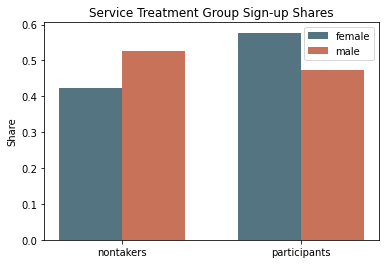

In [117]:
participation_share_plot(ssp, 'Service Treatment Group Sign-up Shares' , 'ssp_p')

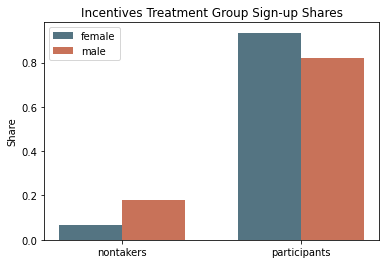

In [118]:
participation_share_plot(sfp, 'Incentives Treatment Group Sign-up Shares' , 'sfp_p')

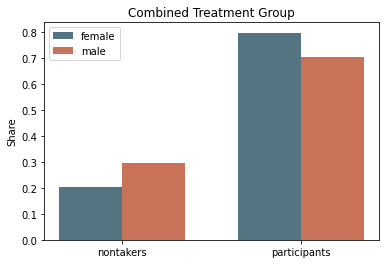

In [120]:
participation_share_plot(sfsp, 'Combined Treatment Group', 'sfsp_p')

#### Treatment Take-Up

Almost half of the students who are offered the academic support service did not sign-up. The participation is highest for financal incentive only group. The combined treatment increases the sign-up rate compared to services only yet the rate is lower than financial incentives onl treatment. Even though the students in combined group were not have to participate in services and could have just taken the fellowship. 

In [121]:
compliance_rate_ssp = ssp[ssp['sex']=='F']['ssp_p'].value_counts(normalize=True).sort_index()
compliance_rate_ssp[1]

0.5773195876288659

In [122]:
compliance_rate_sfp = sfp[sfp['sex']=='F']['sfp_p'].value_counts(normalize=True).sort_index()
compliance_rate_sfp[1]

0.9345794392523364

In [123]:
compliance_rate_sfsp = sfsp[sfsp['sex']=='F']['sfsp_p'].value_counts(normalize=True).sort_index()
compliance_rate_sfsp[1]

0.7966101694915254

---
# 6. Conclusion and Critical Assessment
---
The goal of the STAR demonstration project to learn more about how the academic support services and financial incentives like fellowships improve academic performance in college. The student reports section of Angrist et al. does not mention any student who thinks she is harmed by the program. Even the students who did not meet with their peer advisors said it was nice to know someone was there for them. The facilitated stud group participation was even lower. Angrist et al. argues that that services alone fail to attract students. The authors report that SPP did better in IV-2SLS than in ITT for both men and women. Although it was still statistically insignificant at 10 percent level. They report that this is due to low compliance rate. Another important finding is that even the SFP motivates students, the effect of financial incentive on academic performance fade over time while SFSP has long lasting effects. Angrist et al. (2009) states that services have indeed help students to form better stud habits. Although in order to participate in services, students require additional incentives.

**Program Cost**
The Angrist et al. (2009) reports on modest program costs, arguing that the improved academic performance result in higher future income which can easyly offsett the costs.

| **Program**           | **Cost per individual** |
|-----------------------|-------------------------|
| Services              | 366dollars              |
| Fellowship            | 437dollars              |              

On final remarks, Angrist et al. (2009) highlights the gender effects and points in out as an area of future study. 

I took Table 5 on ITT estimates -as it was reported in Angrist et al. (2009) as main result-, table 8 on IV-2SLS results -as all the assumptions to identify the causal effect is of participation using instrumental variable is met and well-established in the paper- and Figure 1 -showing the treatment effect on each data point- as key results for replication.
My findings are inline with Angrist et al. (2009). Although I followed a different approach in regression data. I used the same dataset for Table 5 and Table 8. Instead of using the unfiltered data set for Table 8. My estimates for the treatment are more modest yet I argue that they are more robust for comparission of the participation effect with offer effect. It seem to be that authors use the full data set in Table 8 to inflate the results of participation. 
As the identification assumptions are met and as the gender differences are highlighted very often in the paper, I focused on how different genders behaved in participation in the program in extention.


---
# 7. References
---

> Angrist, J., Land, D., & Oreopoulos, P. (2009). Incentives And Services For College Achievement: Evidence From A Randomized Trial. American Economic Journal: Applied Economics, 1(1), 136-63.

> Angrist, J. D. and Pischke, J.-S. (2009). Mostly Harmless Econometrics: An Empiricist’s Companion.  Princeton University Press 
[(link)](https://www.researchgate.net/publication/51992844_Mostly_Harmless_Econometrics_An_Empiricist%27s_Companion)

> Eisenhauer, P. (2021). Project template, OpenSourceEconomics. [(link)](https://github.com/OpenSourceEconomics/ose-template-course-project)

> Gehlen, A. (2019). Replication of Jason M. Lindo, Nicholas J. Sanders & Philip Oreopoulos (2010). [(link)](https://github.com/amageh/replication-performance-standards/blob/master/replication-notebook.ipynb)